# Imports

In [47]:
import os
import warnings
import datetime

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.colors as colors

SuppressWarnings = True
SuppressPlots = False

## Suppress Warnings
if SuppressWarnings:
    warnings.filterwarnings("ignore")
if SuppressPlots:
    import matplotlib
    matplotlib.use("Agg")
    
print(datetime.datetime.ctime(datetime.datetime.today()))
print("Matplotlib: ", mpl.__version__)
print("Numpy     : ", np.__version__)
print("Pandas   : ", pd.__version__)
print("Xarray   : ", xr.__version__)

Wed Sep 20 07:31:53 2023
Matplotlib:  3.7.2
Numpy     :  1.24.4
Pandas   :  2.0.3
Xarray   :  2023.6.0


# Functions

In [48]:
def plot(X, Y, Z, title):
    
    # Create a figure with specified size
    fig = plt.figure(figsize=(11, 6.5))

    # Set the axes using the Robinson projection
    ax = plt.axes(projection=ccrs.Robinson())

    # Set the colormap and normalization
    cmap = plt.get_cmap('coolwarm')
    norm = colors.Normalize(vmin=-2, vmax=38)

    # Add cyclic point to the data for smooth plotting
    Z, lons = add_cyclic_point(Z, coord=X)

    # Plot the data using contourf
    cs = ax.contourf(lons, Y, Z, levels=10, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    # Add coastlines to the plot
    ax.coastlines()

    # Add colorbar to the plot
    cbar = plt.colorbar(cs, shrink=0.6, orientation='horizontal', label='SST (Celsius)')

    # Set the title of the plot
    plt.title(title)

    # Display the plot
    plt.show()

In [49]:
# Define the directory path
path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/CCSM4_plio.nc'
ds = xr.open_dataset(path)
    plot(
        pliodataset['lon'],
        pliodataset['lat'],
        pliodataset['TEMP'][0, :, :],
        title= 

## Contour Plots of Manipulated Files

In [41]:
# Define the directory path
path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'

# List of file names to process
file_plio = ['CCSM4_plio.nc', 'CESM1.2_plio.nc', 'CESM2_plio.nc', 'COSMOS_plio.nc',
             'EC_Earth3.3_plio.nc', 'GISS_plio.nc', 'HADGEM3_NEW_1997_plio.nc', 'IPSLCM6A_LR_plio.nc',
             'MIROC4_2004_plio.nc', 'Utrecht_CESM1.0.5_plio.nc']

# Create an empty list to store sliced datasets
pliods = []

# Loop through the file names and append datasets to pliods
for file_plio in file_plio:
    file_path = path + file_plio
    pliodataset = xr.open_dataset(file_path)
    pliods.append(pliodataset)

file_pi = ['CCSM4_pi.nc', 'CESM1.2_pi.nc', 'CESM2_pi.nc', 'COSMOS_pi.nc',
           'EC_Earth3.3_pi.nc', 'GISS_pi.nc', 'HADGEM3_NEW_1997_pi.nc', 'IPSLCM6A_LR_pi.nc',
           'MIROC4_2004_pi.nc', 'Utrecht_CESM1.0.5_pi.nc']

# Create an empty list to store sliced datasets
pids = []

# Loop through the file names and append datasets to pids
for file_pi in file_pi:
    file_path = path + file_pi
    pidataset = xr.open_dataset(file_path)
    pids.append(pidataset)

pliotitles = ["CCSM4 Average Upper Ocean Temperature (Pliocene)",
              "CESM 1.2 Average Upper Ocean Temperature (Pliocene)",
              "CESM2 Average Upper Ocean Temperature (Pliocene)",
              "COSMOS Average Upper Ocean Temperature (Pliocene)",
              "EC-Earth 3.3 Average Upper Ocean Temperature (Pliocene)",
              "HADGEM3 NEW 1997 Average Upper Ocean Temperature (Pliocene)",
              "MIROC4 2004 Average Upper Ocean Temperature (Pliocene)",
              "Ultrecht CESM1.0.5 Average Upper Ocean Temperature (Pliocene)",
              "IPSLCM6A_LR Average Upper Ocean Temperature (Pliocene)",
              "GISS Average Upper Ocean Temperature (Pliocene)"]

pititles = ["CCSM4 Average Upper Ocean Temperature (Preindustrial)",
            "CESM 1.2 Average Upper Ocean Temperature (Preindustrial)",
            "CESM2 Average Upper Ocean Temperature (Preindustrial)",
            "COSMOS Average Upper Ocean Temperature (Preindustrial)",
            "EC-Earth 3.3 Average Upper Ocean Temperature (Preindustrial)",
            "HADGEM3 NEW 1997 Average Upper Ocean Temperature (Preindustrial)",
            "MIROC4 2004 Average Upper Ocean Temperature (Preindustrial)",
            "Ultrecht CESM1.0.5 Average Upper Ocean Temperature (Preindustrial)",
            "IPSLCM6A_LR Average Upper Ocean Temperature (Preindustrial)",
            "GISS Average Upper Ocean Temperature (Preindustrial)"]

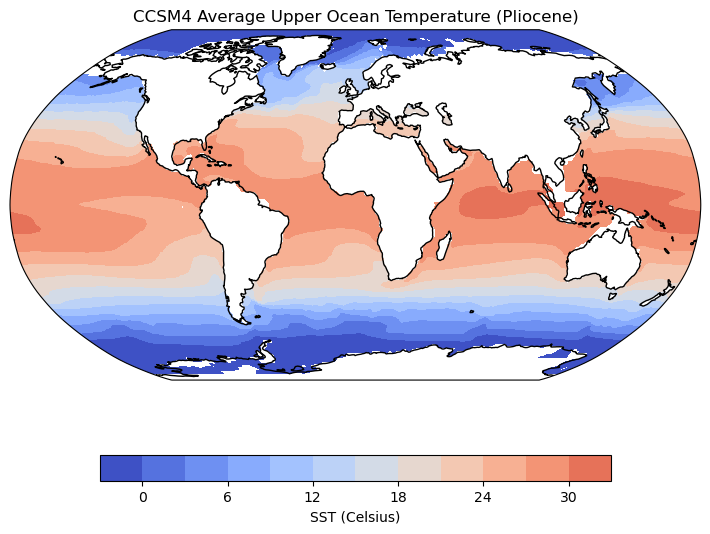

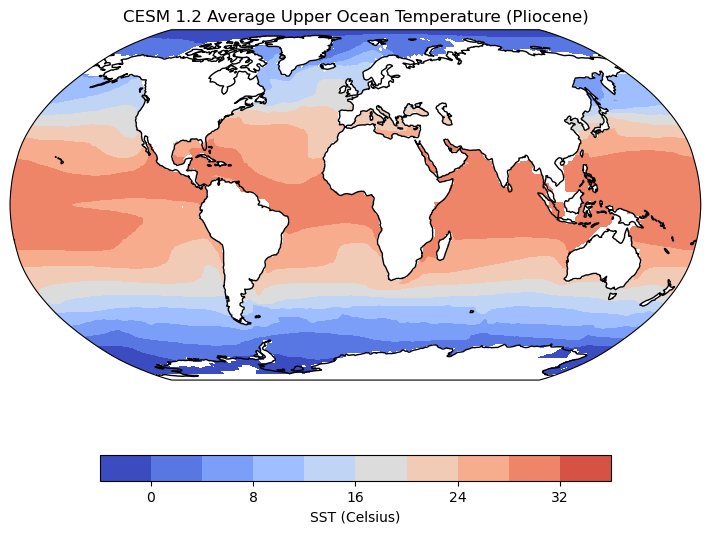

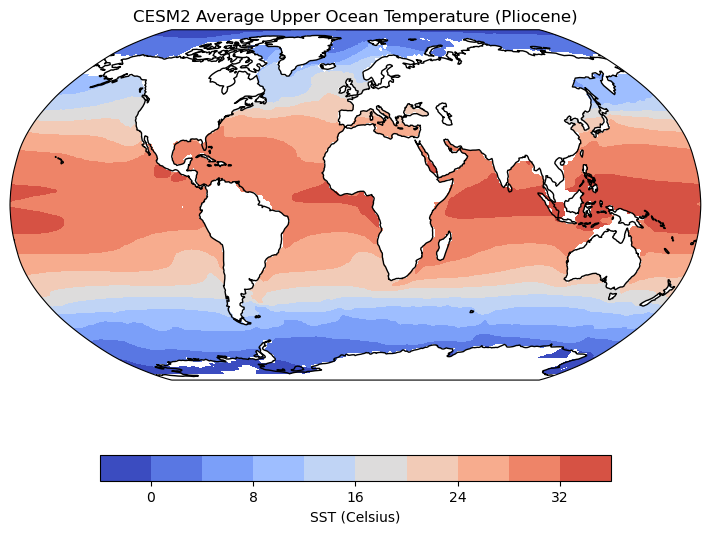

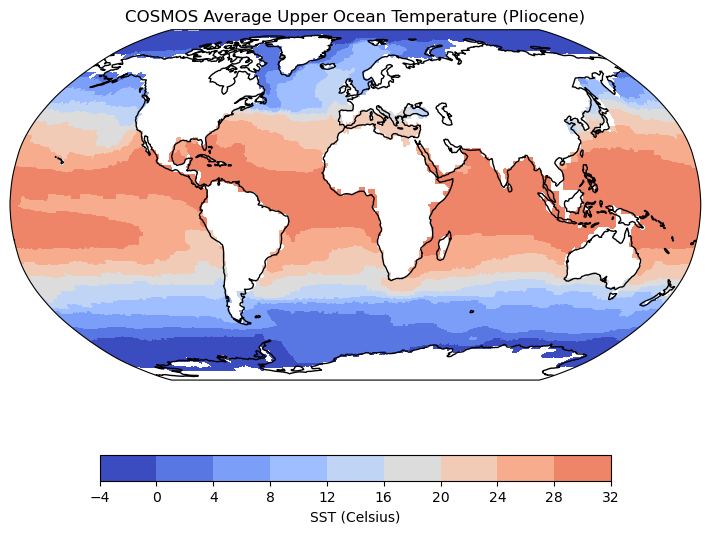

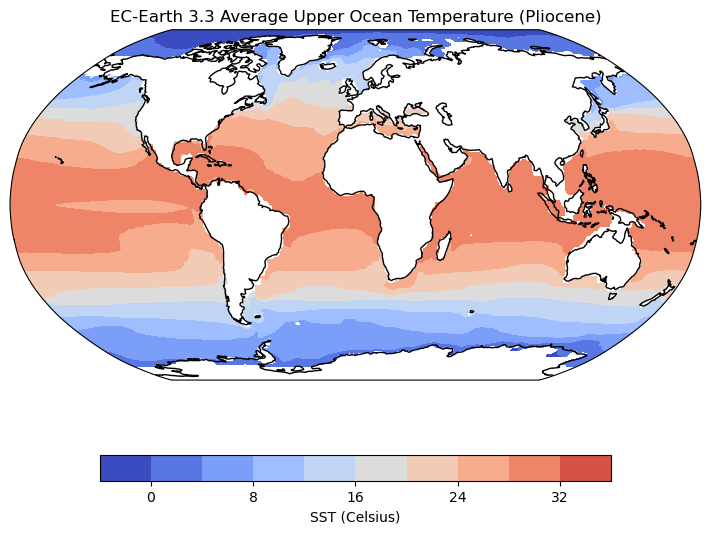

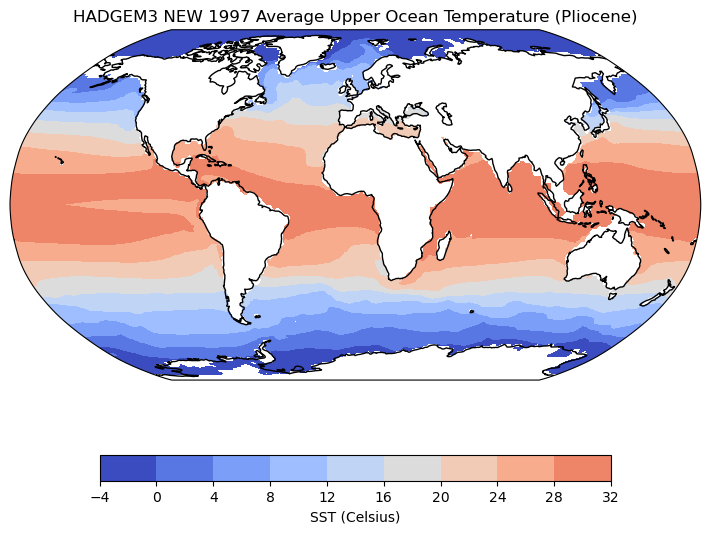

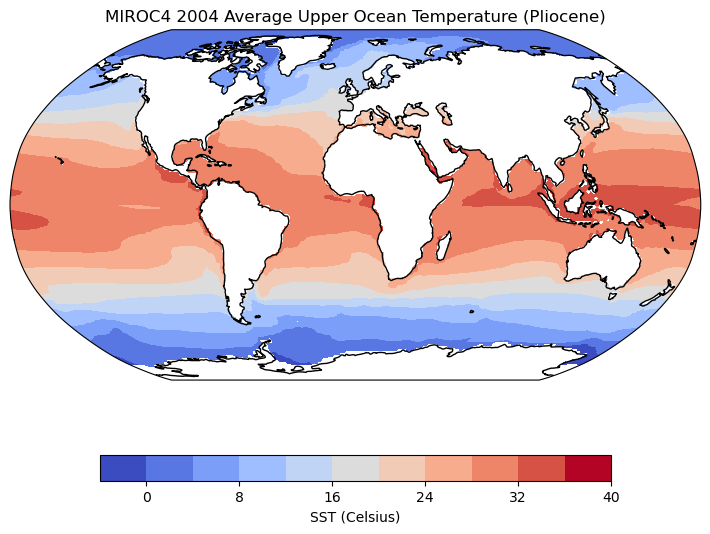

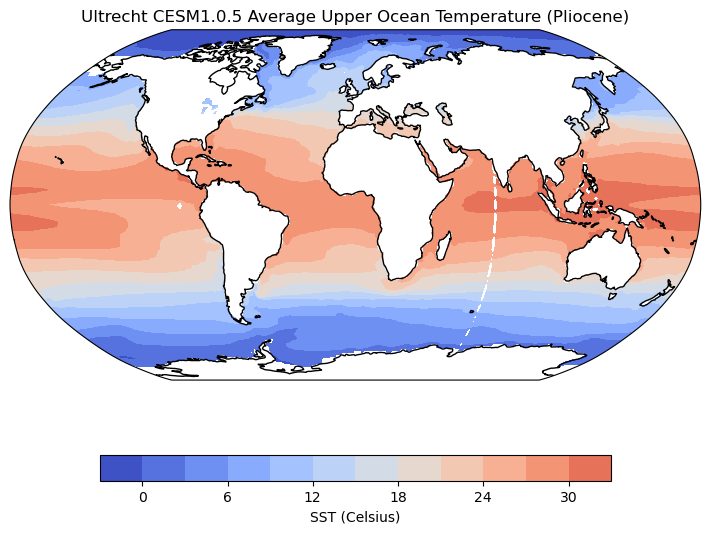

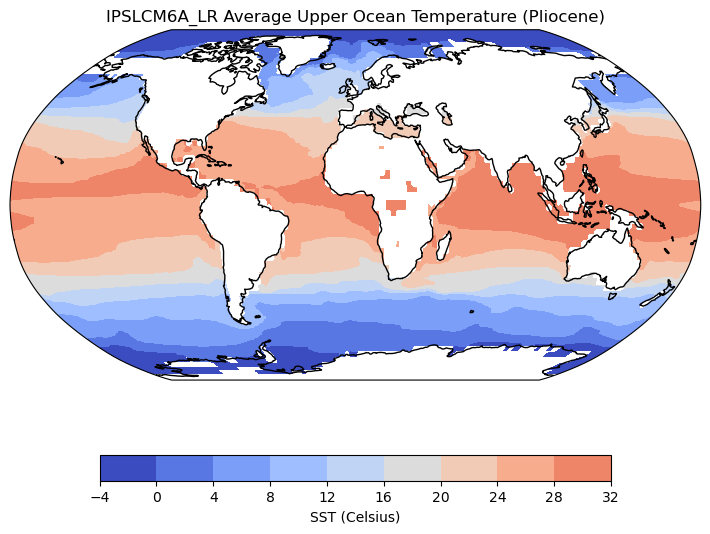

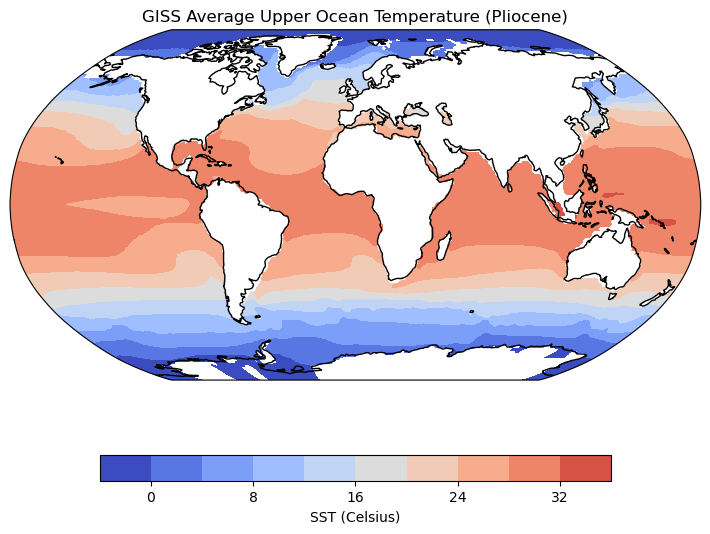

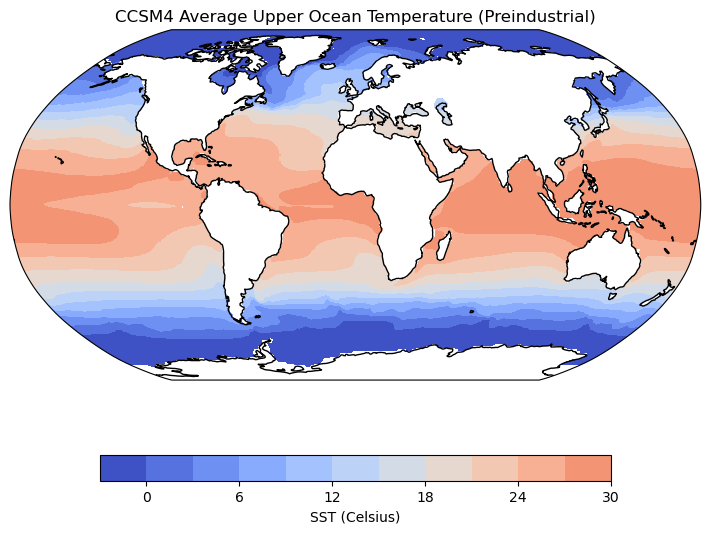

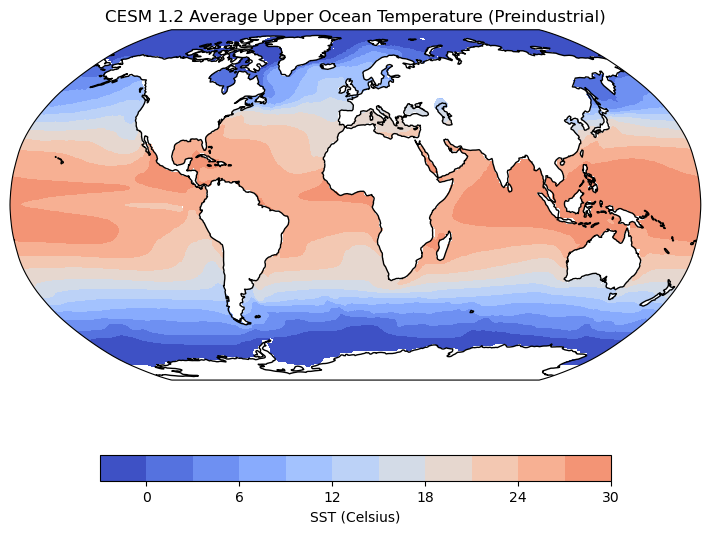

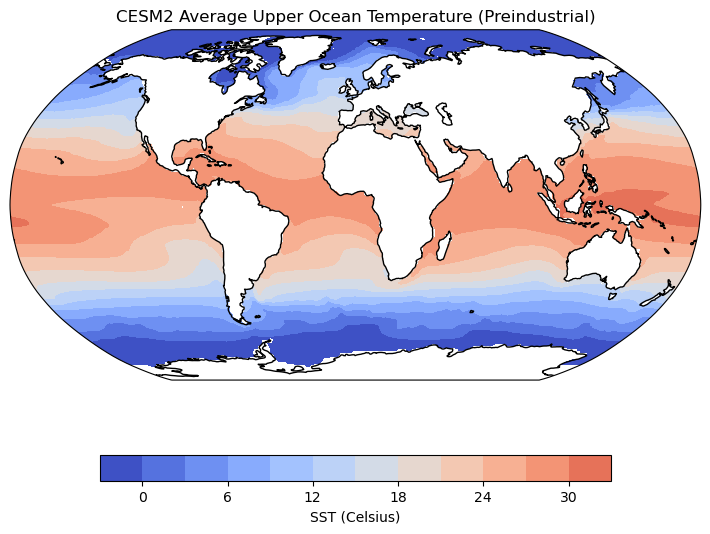

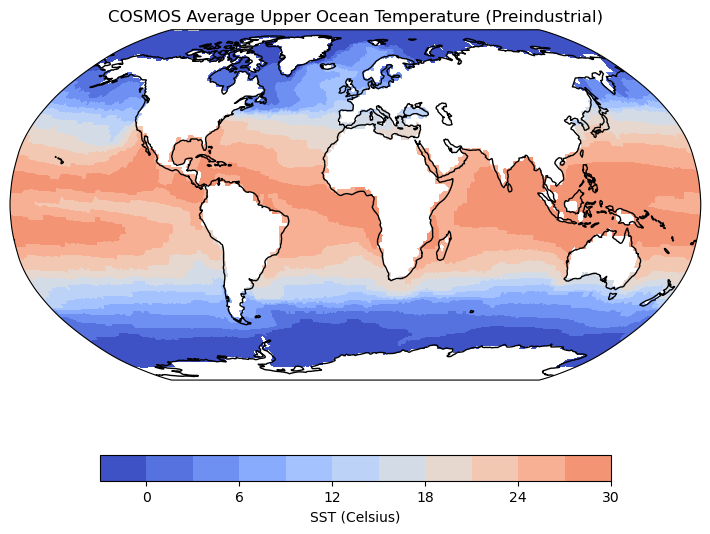

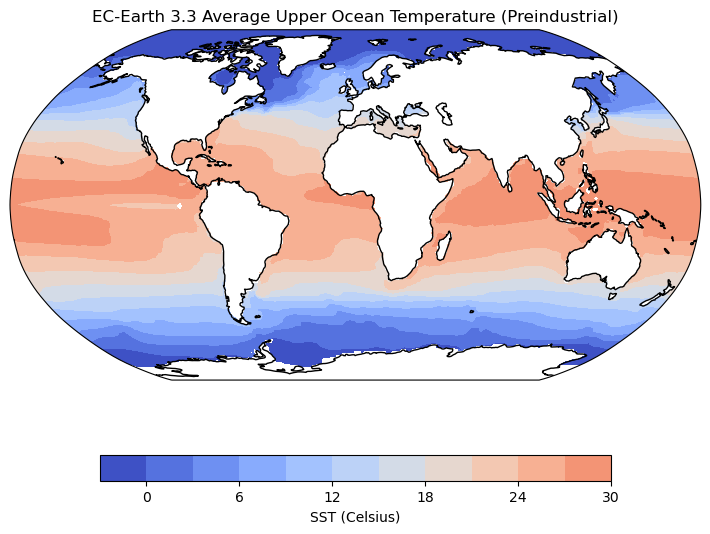

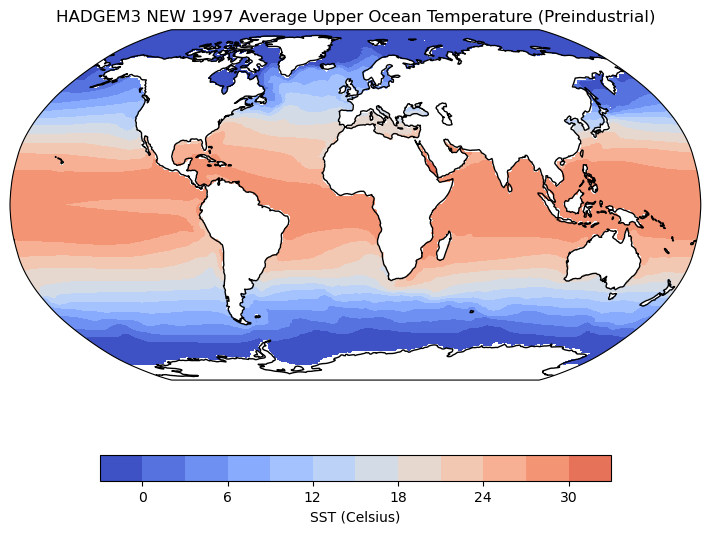

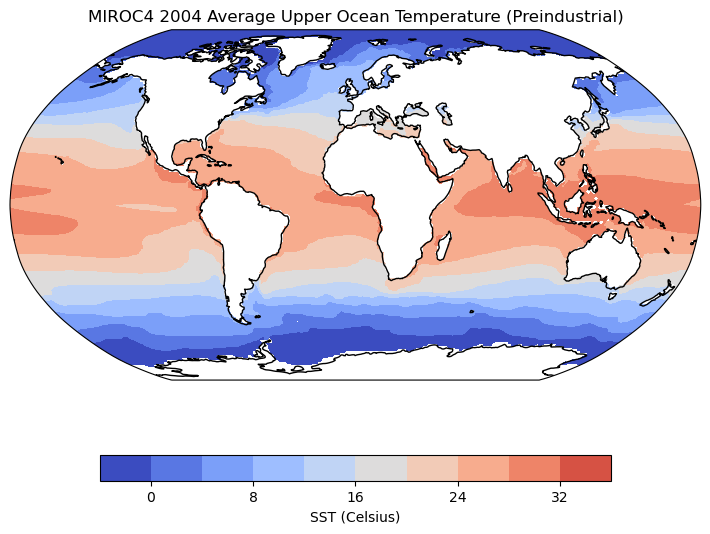

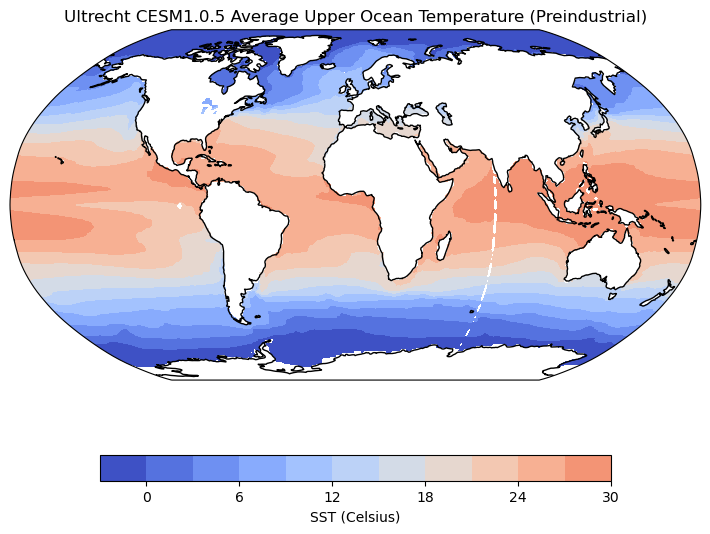

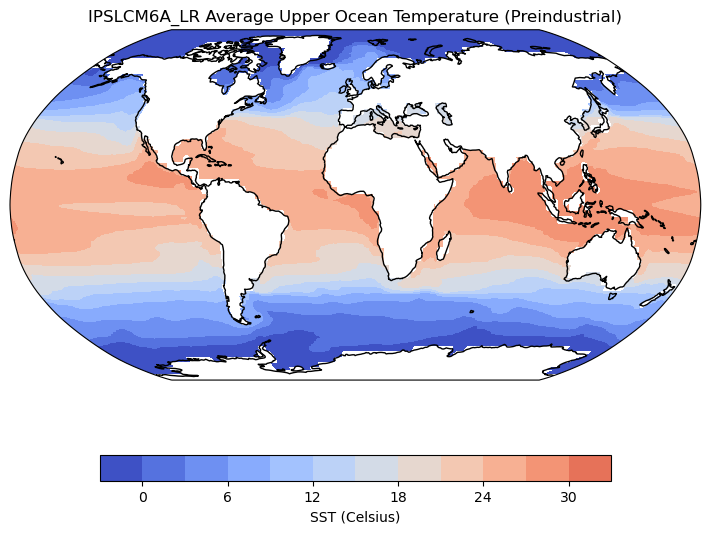

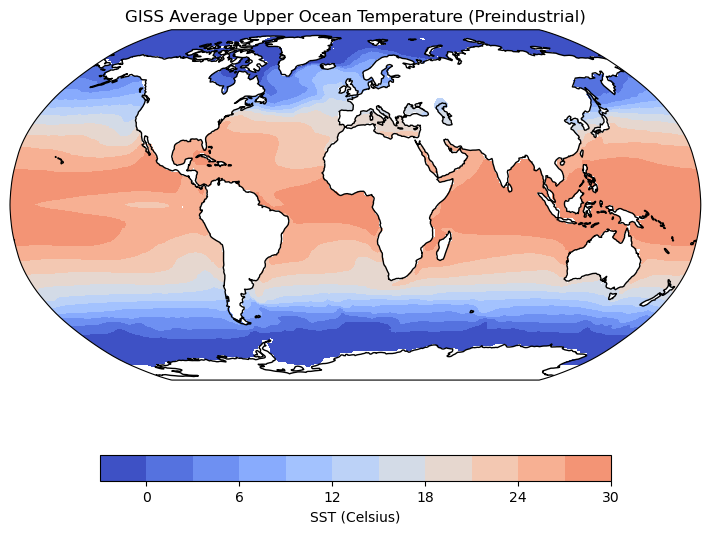

In [43]:
# Loop through pliods and pliotitles simultaneously
for i, pliodataset in enumerate(pliods):
    title = pliotitles[i]
    plot(
        pliodataset['lon'],
        pliodataset['lat'],
        pliodataset['TEMP'][0, :, :],
        title=title
    )

# Loop through pids and pititles simultaneously
for i, pidataset in enumerate(pids):
    title = pititles[i]
    plot(
        pidataset['lon'],
        pidataset['lat'],
        pidataset['TEMP'][0, :, :],
        title=title
    )